## One-Dimentional Data

In [2]:
from typing import List, Dict
from collections import Counter
import math

from matplotlib import pyplot as plt

def bucketize(point: float, bucket_size: float) -> float:
    """Floor the point to the next lower multiple of bucket_size"""
    return bucket_size * math.floor(point / bucket_size)

def make_histogram(points: List[float], bucket_size: float) -> Dict[float, int]:
    """Buckets the points and counts how many in each bucket"""
    return Counter(bucketize(point, bucket_size) for point in points)

def plot_histogram(points: List[float], bucket_size: float, title: str = ""):
    histogram = make_histogram(points, bucket_size)
    plt.bar(histogram.keys(), histogram.values(), width=bucket_size)
    plt.title(title)


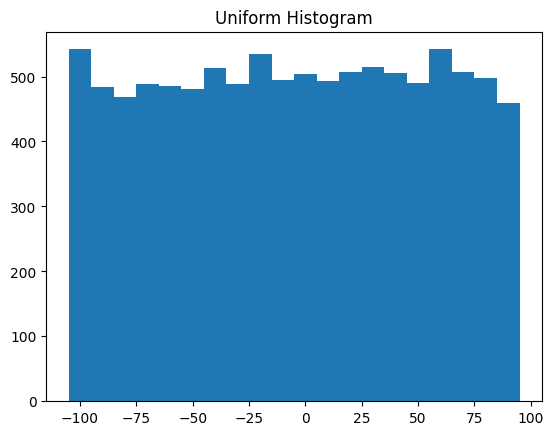

In [4]:
import random
from scratch.probability import inverse_normal_cdf

random.seed(0)

# uniform between -100 and 100
uniform = [200 * random.random() - 100 for _ in range(10000)]

# normal distribution with mean 0, standard deviation 57
normal = [57 * inverse_normal_cdf(random.random())
            for _ in range(10000)]

plot_histogram(uniform, 10, "Uniform Histogram")

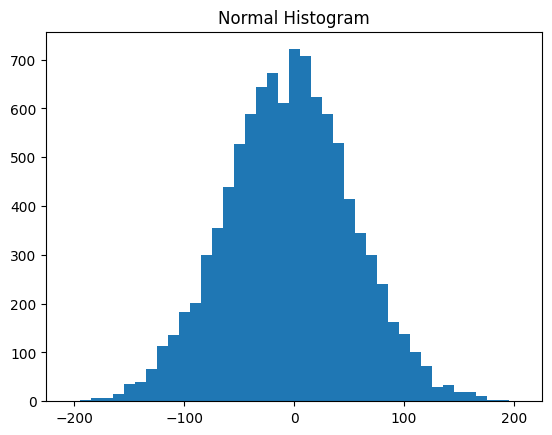

In [5]:
plot_histogram(normal, 10, "Normal Histogram")

## Two-Dimentional Data

Text(0.5, 1.0, 'Very Different Joint Distributions')

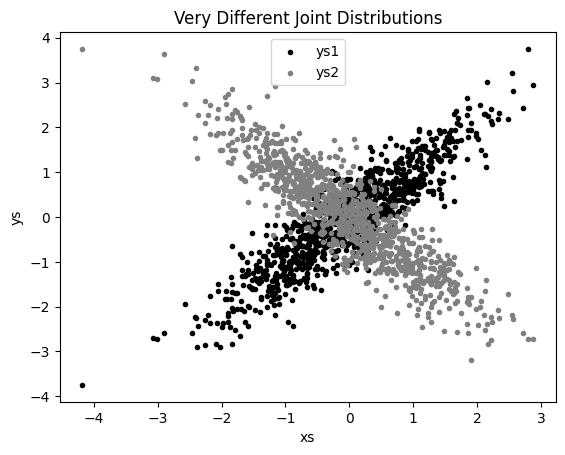

In [6]:
import random
from scratch.probability import inverse_normal_cdf

def random_normal() -> float:
    """Returns a random draw from a standard normal distribution"""
    return inverse_normal_cdf(random.random())

xs = [random_normal() for _ in range(1000)]
ys1 = [ x + random_normal() / 2 for x in xs]
ys2 = [-x + random_normal() / 2 for x in xs]

plt.scatter(xs, ys1, marker='.', color='black', label='ys1')
plt.scatter(xs, ys2, marker='.', color='gray',  label='ys2')
plt.xlabel('xs')
plt.ylabel('ys')
plt.legend(loc=9)
plt.title("Very Different Joint Distributions")
# plt.show()

In [8]:
from scratch.statistics import correlation

assert 0.89 < correlation(xs, ys1) < 0.91
assert -0.91 < correlation(xs, ys2) < -0.89

## Multi-Dimentional Data

In [9]:
from scratch.linear_algebra import Matrix, Vector, make_matrix

def correlation_matrix(data: List[Vector]) -> Matrix:
    """
    Returns the len(data) x len(data) matrix whose (i, j)-th entry
    is the correlation between data[i] and data[j]
    """
    def correlation_ij(i: int, j: int) -> float:
        return correlation(data[i], data[j])

    return make_matrix(len(data), len(data), correlation_ij)

In [10]:
num_points = 100

def random_row() -> List[float]:
    row = [0.0, 0, 0, 0]
    row[0] = random_normal()
    row[1] = -5 * row[0] + random_normal()
    row[2] = row[0] + row[1] + 5 * random_normal()
    row[3] = 6 if row[2] > -2 else 0
    return row

random.seed(0)
# each row has 4 points, but really we want the columns
corr_rows = [random_row() for _ in range(num_points)]

corr_data = [list(col) for col in zip(*corr_rows)]

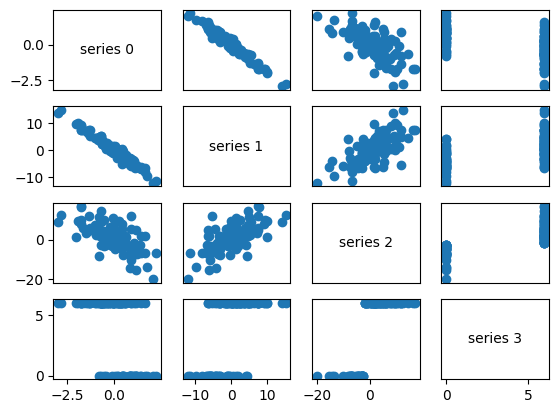

In [11]:
# corr_data is a list of four 100-d vectors
num_vectors = len(corr_data)
fig, ax = plt.subplots(num_vectors, num_vectors)

for i in range(num_vectors):
    for j in range(num_vectors):

        # Scatter column_j on the x-axis vs column_i on the y-axis,
        if i != j: ax[i][j].scatter(corr_data[j], corr_data[i])

        # unless i == j, in which case show the series name.
        else: ax[i][j].annotate("series " + str(i), (0.5, 0.5),
                                xycoords='axes fraction',
                                ha="center", va="center")

        # Then hide axis labels except left and bottom charts
        if i < num_vectors - 1: ax[i][j].xaxis.set_visible(False)
        if j > 0: ax[i][j].yaxis.set_visible(False)

# Fix the bottom right and top left axis labels, which are wrong because
# their charts only have text in them
ax[-1][-1].set_xlim(ax[0][-1].get_xlim())
ax[0][0].set_ylim(ax[0][1].get_ylim())
plt.show()

## NamedTuples

In [13]:
import datetime

stock_price = {'closing_price': 102.06,
               'date': datetime.date(2014, 8, 29),
               'symbol': 'AAPL'}

# oops, typo
stock_price['cosing_price'] = 103.06

prices: Dict[datetime.date, float] = {}

In [16]:
from collections import namedtuple
StockPrice = namedtuple("StockPrice", ["symbol", "date", "closing_price"])
price = StockPrice("MSFT", datetime.date(2018, 12, 14), 106.03)
price[0]

'MSFT'

In [15]:
namedtuple?

Signature:
namedtuple(
    typename,
    field_names,
    *,
    rename=False,
    defaults=None,
    module=None,
)
Docstring:
Returns a new subclass of tuple with named fields.

>>> Point = namedtuple('Point', ['x', 'y'])
>>> Point.__doc__                   # docstring for the new class
'Point(x, y)'
>>> p = Point(11, y=22)             # instantiate with positional args or keywords
>>> p[0] + p[1]                     # indexable like a plain tuple
33
>>> x, y = p                        # unpack like a regular tuple
>>> x, y
(11, 22)
>>> p.x + p.y                       # fields also accessible by name
33
>>> d = p._asdict()                 # convert to a dictionary
>>> d['x']
11
>>> Point(**d)                      # convert from a dictionary
Point(x=11, y=22)
>>> p._replace(x=100)               # _replace() is like str.replace() but targets named fields
Point(x=100, y=22)
File:      c:\python39\lib\collections\__init__.py
Type:      function

In [ ]:
from typing import NamedTuple

class StockPrice(NamedTuple):
    symbol: str
    date: datetime.date
    closing_price: float

    def is_high_tech(self) -> bool:
        """It's a class, so we can add methods too"""
        return self.symbol in ['MSFT', 'GOOG', 'FB', 'AMZN', 'AAPL']

price = StockPrice('MSFT', datetime.date(2018, 12, 14), 106.03)

assert price.symbol == 'MSFT'
assert price.closing_price == 106.03
assert price.is_high_tech()

## Resizing

In [17]:
from scratch.linear_algebra import distance

# weight in pounds and height in inches
a_to_b = distance([63, 150], [67, 160])        # 10.77
a_to_c = distance([63, 150], [70, 171])        # 22.14
b_to_c = distance([67, 160], [70, 171])        # 11.40

# weight in pounds and height in centimeters
a_to_b = distance([160, 150], [170.2, 160])    # 14.28
a_to_c = distance([160, 150], [177.8, 171])    # 27.53
b_to_c = distance([170.2, 160], [177.8, 171])  # 13.37

In [18]:
from typing import Tuple

from scratch.linear_algebra import vector_mean
from scratch.statistics import standard_deviation

def scale(data: List[Vector]) -> Tuple[Vector, Vector]:
    """returns the means and standard deviations for each position"""
    dim = len(data[0])

    means = vector_mean(data)
    stdevs = [standard_deviation([vector[i] for vector in data])
              for i in range(dim)]

    return means, stdevs

vectors = [[-3, -1, 1], [-1, 0, 1], [1, 1, 1]]
means, stdevs = scale(vectors)
assert means == [-1, 0, 1]
assert stdevs == [2, 1, 0]

In [19]:
def rescale(data: List[Vector]) -> List[Vector]:
    """
    Rescales the input data so that each position has
    mean 0 and standard deviation 1. (Leaves a position
    as is if its standard deviation is 0.)
    """
    dim = len(data[0])
    means, stdevs = scale(data)

    # Make a copy of each vector
    rescaled = [v[:] for v in data]

    for v in rescaled:
        for i in range(dim):
            if stdevs[i] > 0:
                v[i] = (v[i] - means[i]) / stdevs[i]

    return rescaled

means, stdevs = scale(rescale(vectors))
assert means == [0, 0, 1]
assert stdevs == [1, 1, 0]

## `tqdm`

In [20]:
import tqdm

for i in tqdm.tqdm(range(100)):
    _ = [random.random() for _ in range(1_000_000)]


100%|██████████| 100/100 [00:09<00:00, 10.62it/s]


In [21]:
from typing import List

def primes_up_to(n: int) -> List[int]:
    primes = [2]

    with tqdm.trange(3, n) as t:
        for i in t:
            # i is prime if no smaller prime divides it.
            i_is_prime = not any(i % p == 0 for p in primes)
            if i_is_prime:
                primes.append(i)

            t.set_description(f"{len(primes)} primes")

    return primes

my_primes = primes_up_to(100_000)

9592 primes: 100%|██████████| 99997/99997 [02:00<00:00, 827.34it/s] 
